# Pengenalan Teori Graf

#### Contoh kasus 1 
Dalam contoh kasus pertama kali ini, Kita akan mencoba membangun sebuah graf dengan struktur sebagai berikut.
![Screen%20Shot%202022-03-03%20at%2022.21.14.png](attachment:Screen%20Shot%202022-03-03%20at%2022.21.14.png)
Dalam merepresentasikan bentuk graf tersebut, kita akan membuat 2 fungsi untuk memudah

In [1]:
## Blok program ini Anda mencoba mendefinisikan node dan hubungan Antara node dalam bentuk obyek.
graph = { "a" : {"c"},
          "b" : {"c", "e"},
          "c" : {"a", "b", "d", "e"},
          "d" : {"c"},
          "e" : {"c", "b"},
          "f" : {}
        }

In [2]:
## Blok program ini Anda mencoba membuat EDGE dari informasi yang sudah Anda definisikan sebelumnya.
def generate_edges(graph):
    edges = []
    for node in graph:
        for neighbour in graph[node]:
            edges.append({node, neighbour})

    return edges

In [3]:
print(generate_edges(graph))

[{'a', 'c'}, {'e', 'b'}, {'b', 'c'}, {'e', 'c'}, {'a', 'c'}, {'b', 'c'}, {'d', 'c'}, {'c', 'd'}, {'b', 'e'}, {'e', 'c'}]


In [4]:
## Blok program ini Anda mendefinisikan sebuah fungsi untuk mengetahui node mana yang tidak memiliki edge
def find_isolated_nodes(graph):
    """ returns a set of isolated nodes. """
    isolated = set()
    for node in graph:
        if not graph[node]:
            isolated.add(node)
    return isolated

In [5]:
print(find_isolated_nodes(graph))

{'f'}


#### Contoh kasus 2 
Dalam contoh kasus kedua kali ini, Kita akan mencoba membangun sebuah graf dan mendapatkan informasi lebih detail 
mengenai graf tersebut. Untuk memudahkan, Kita akan mendefinisikan sebuah Class dalam bahasa pemrograman python, 
dimana Class ini berisi beberapa fungsi yang bisa kita gunakan untuk mengetahui informasi detail mengenai stuktur dari graf yang kita miliki

In [6]:
""" A Python Class
A simple Python graph class, demonstrating the essential 
facts and functionalities of graphs.
"""


class Graph(object):

    def __init__(self, graph_dict=None):
        """ initializes a graph object 
            If no dictionary or None is given, 
            an empty dictionary will be used
        """
        if graph_dict == None:
            graph_dict = {}
        self._graph_dict = graph_dict

    def edges(self, vertice):
        """ returns a list of all the edges of a vertice"""
        return self._graph_dict[vertice]
        
    def all_vertices(self):
        """ returns the vertices of a graph as a set """
        return set(self._graph_dict.keys())

    def all_edges(self):
        """ returns the edges of a graph """
        return self.__generate_edges()

    def add_vertex(self, vertex):
        """ If the vertex "vertex" is not in 
            self._graph_dict, a key "vertex" with an empty
            list as a value is added to the dictionary. 
            Otherwise nothing has to be done. 
        """
        if vertex not in self._graph_dict:
            self._graph_dict[vertex] = []

    def add_edge(self, edge):
        """ assumes that edge is of type set, tuple or list; 
            between two vertices can be multiple edges! 
        """
        edge = set(edge)
        vertex1, vertex2 = tuple(edge)
        for x, y in [(vertex1, vertex2), (vertex2, vertex1)]:
            if x in self._graph_dict:
                self._graph_dict[x].add(y)
            else:
                self._graph_dict[x] = [y]

    def __generate_edges(self):
        """ A static method generating the edges of the 
            graph "graph". Edges are represented as sets 
            with one (a loop back to the vertex) or two 
            vertices 
        """
        edges = []
        for vertex in self._graph_dict:
            for neighbour in self._graph_dict[vertex]:
                if {neighbour, vertex} not in edges:
                    edges.append({vertex, neighbour})
        return edges
    
    def __iter__(self):
        self._iter_obj = iter(self._graph_dict)
        return self._iter_obj
    
    def __next__(self):
        """ allows us to iterate over the vertices """
        return next(self._iter_obj)

    def __str__(self):
        res = "vertices: "
        for k in self._graph_dict:
            res += str(k) + " "
        res += "\nedges: "
        for edge in self.__generate_edges():
            res += str(edge) + " "
        return res

In [7]:
g = { "a" : {"d"},
      "b" : {"c"},
      "c" : {"b", "c", "d", "e"},
      "d" : {"a", "c"},
      "e" : {"c"},
      "f" : {}
    }

In [8]:
graph = Graph(g)

for vertice in graph:
    print("Edges of vertice {vertice}: ", graph.edges(vertice))

Edges of vertice {vertice}:  {'d'}
Edges of vertice {vertice}:  {'c'}
Edges of vertice {vertice}:  {'e', 'd', 'b', 'c'}
Edges of vertice {vertice}:  {'a', 'c'}
Edges of vertice {vertice}:  {'c'}
Edges of vertice {vertice}:  {}


In [9]:
graph.add_edge({"ab", "fg"})
graph.add_edge({"xyz", "bla"})

In [10]:
print("")
print("Vertices of graph:")
print(graph.all_vertices())

print("Edges of graph:")
print(graph.all_edges())


Vertices of graph:
{'e', 'a', 'fg', 'xyz', 'f', 'bla', 'd', 'ab', 'b', 'c'}
Edges of graph:
[{'a', 'd'}, {'b', 'c'}, {'e', 'c'}, {'d', 'c'}, {'c'}, {'ab', 'fg'}, {'xyz', 'bla'}]


#### Contoh kasus 3
Dalam contoh kasus ketiga kali ini, Kita akan mencoba membangun sebuah graf dengan menggunakan library networkx dan matplotlib

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

In [12]:
# Creating a Graph 
G = nx.Graph() # Right now G is empty


In [13]:
G.add_node(1) 
G.add_nodes_from([2,3])

In [14]:
G.add_edge(1,2)

In [15]:
e = (2,3)
G.add_edge(*e) # * unpacks the tuple
G.add_edges_from([(1,2), (1,3)])

In [16]:
G.nodes()

NodeView((1, 2, 3))

In [17]:
G.edges()

EdgeView([(1, 2), (1, 3), (2, 3)])

In [18]:
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(1, 4)
G.add_edge(1, 5)

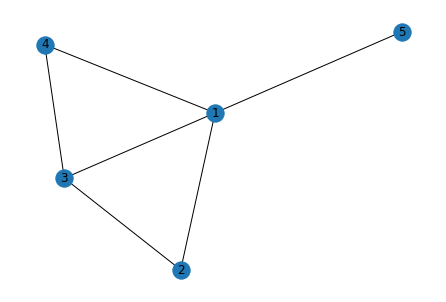

In [19]:
nx.draw(G, with_labels = True)

In [20]:
plt.savefig("contoh-graf-1.png")

<Figure size 432x288 with 0 Axes>

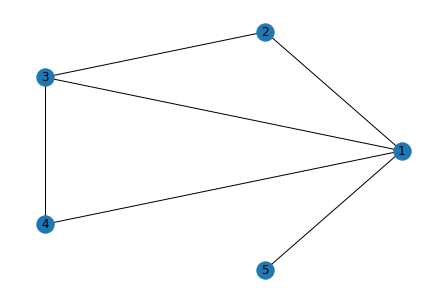

In [21]:
# drawing in circular layout
nx.draw_circular(G, with_labels = True)

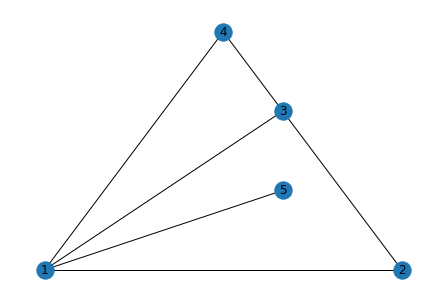

In [24]:
nx.draw_planar(G, with_labels = True)

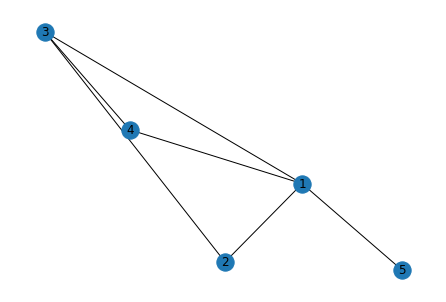

In [25]:
nx.draw_random(G, with_labels = True)

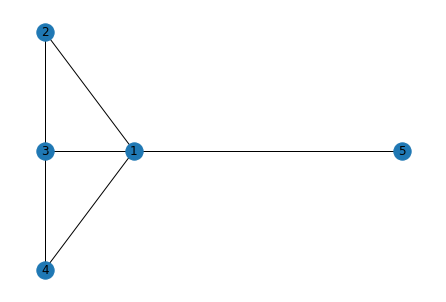

In [26]:
nx.draw_spectral(G, with_labels = True)

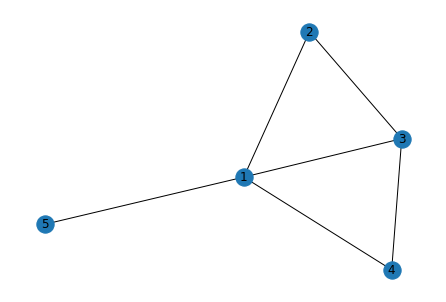

In [27]:
nx.draw_spring(G, with_labels = True)

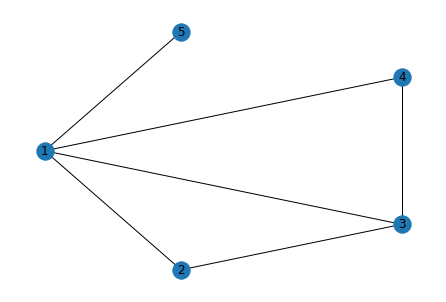

In [28]:
nx.draw_shell(G, with_labels = True)